In [1]:
import tweepy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
currtime = datetime.datetime.now().strftime('%m/%d/%y')

In [2]:
target_users = ('@BBC','@CBS','@CNN','@FoxNews','@nytimes')
details = []
for user in target_users:
    counter = 1
    for x in range(5):
        
        tweets = api.user_timeline(user, page=x)
        
        for tweet in tweets:
            
            tweet_detail = {}
            tweet_detail['News Outlet'] = user
            tweet_detail['Tweet Text'] = tweet['text']
            analysis = analyzer.polarity_scores(tweet['text'])
            tweet_detail['Positive'] = analysis['pos']
            tweet_detail['Neutral'] = analysis['neu']
            tweet_detail['Negative'] = analysis['neg']
            tweet_detail['Compound'] = analysis['compound']
            tweet_detail['Tweeted At'] = datetime.datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_detail['Tweets Ago'] = counter
            counter += 1
            details.append(tweet_detail)
            
    

In [3]:
df = pd.DataFrame(details)
titles = ['News Outlet','Tweet Text','Tweeted At','Positive','Negative','Neutral','Compound','Tweets Ago']
df = df.reindex(columns=titles)
df.head()

,News Outlet,Tweet Text,Tweeted At,Positive,Negative,Neutral,Compound,Tweets Ago
0,@BBC,"In this revealingly intimate documentary, Adri...",2018-08-27 19:03:04+00:00,0.171,0.057,0.772,0.5859,1
1,@BBC,More than half of Borneo's orangutans have per...,2018-08-27 18:12:05+00:00,0.000,0.138,0.862,-0.4939,2
2,@BBC,🎻 The incredible orchestra with a difference. ...,2018-08-27 17:05:04+00:00,0.000,0.000,1.000,0.0000,3
3,@BBC,An increasing number of South Korean women are...,2018-08-27 16:03:04+00:00,0.056,0.000,0.944,0.0772,4
4,@BBC,"😂🐋🚌 'Before there were London buses, what did ...",2018-08-27 14:08:03+00:00,0.000,0.000,1.000,0.0000,5


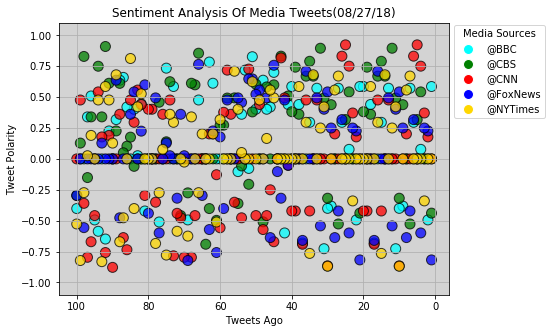

In [4]:
colors = []
for i in range(len(df)):
    outlet = df.iloc[i,0]
    if outlet == '@BBC':
        colors.append('cyan')
    elif outlet == '@CBS':
        colors.append('green')
    elif outlet == '@CNN':
        colors.append('red')
    elif outlet == '@FoxNews':
        colors.append('blue')
    else:
        colors.append('gold')

fig, ax = plt.subplots()
ax.scatter(df['Tweets Ago'], df['Compound'], c=colors, edgecolors='k', s=100,alpha=0.75)
ax.grid()
ax.set_xlabel('Tweets Ago')
ax.set_ylabel('Tweet Polarity')
ax.set_facecolor('lightgrey')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='@BBC',markerfacecolor='cyan', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='@CBS',markerfacecolor='green', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='@CNN',markerfacecolor='red', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='@FoxNews',markerfacecolor='blue', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='@NYTimes',markerfacecolor='gold', markersize=10)]
ax.legend(handles=legend_elements,title='Media Sources',bbox_to_anchor=(1,1.01))
ax.set_xlim(max(df['Tweets Ago']) + 5,min(df['Tweets Ago']) -5)
ax.set_ylim(-1.1,1.1)
ax.set_title(f'Sentiment Analysis Of Media Tweets({currtime})')
fig.set_size_inches(7,5)
fig.savefig('MediaTweetAnalysis.png')

In [5]:
plt.show()

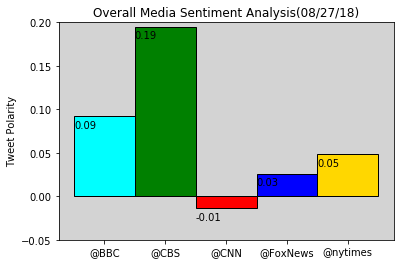

In [11]:
colors = ['cyan','green','red','blue','gold']
fig, ax = plt.subplots()
container = ax.bar(target_users,df.groupby('News Outlet')['Compound'].mean(), color=colors,width=1.0,edgecolor='black')
ax.set_ylabel('Tweet Polarity')
ax.set_title(f'Overall Media Sentiment Analysis({currtime})')
ax.set_ylim(-0.05,0.2)
ax.set_facecolor('lightgrey')
for rect in container.patches:
    ax.text(rect.get_x(), rect.get_height()-0.01,s=round(rect.get_height(),2),ha='left', va='center')
fig.savefig('OverallAnalysis.png')

In [7]:
plt.show()